# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [2]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

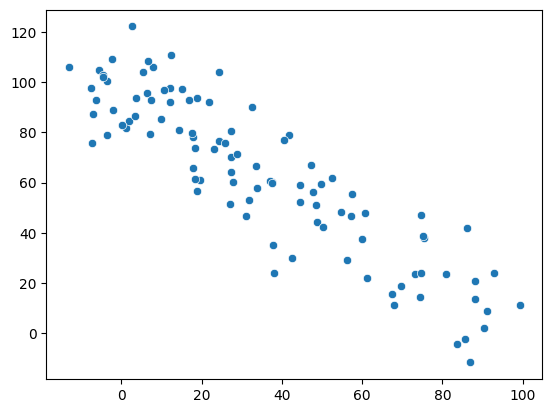

In [3]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [4]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

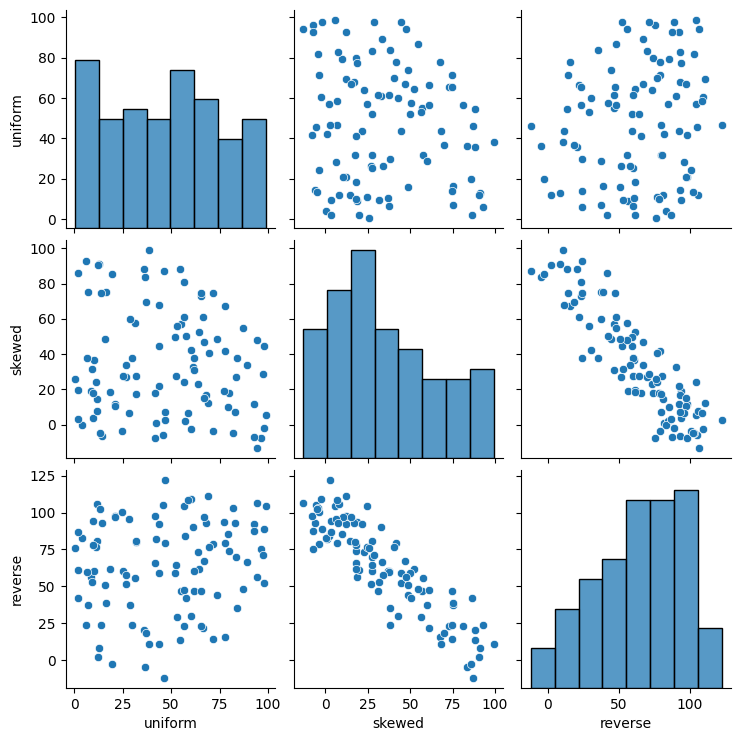

In [5]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [6]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [7]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

/tmp/ipykernel_127054/2082488306.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

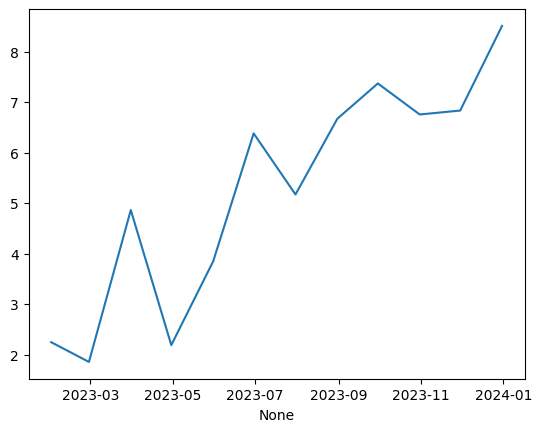

In [ ]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

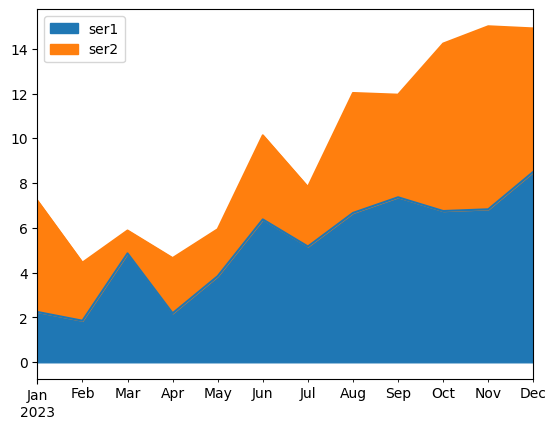

In [ ]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

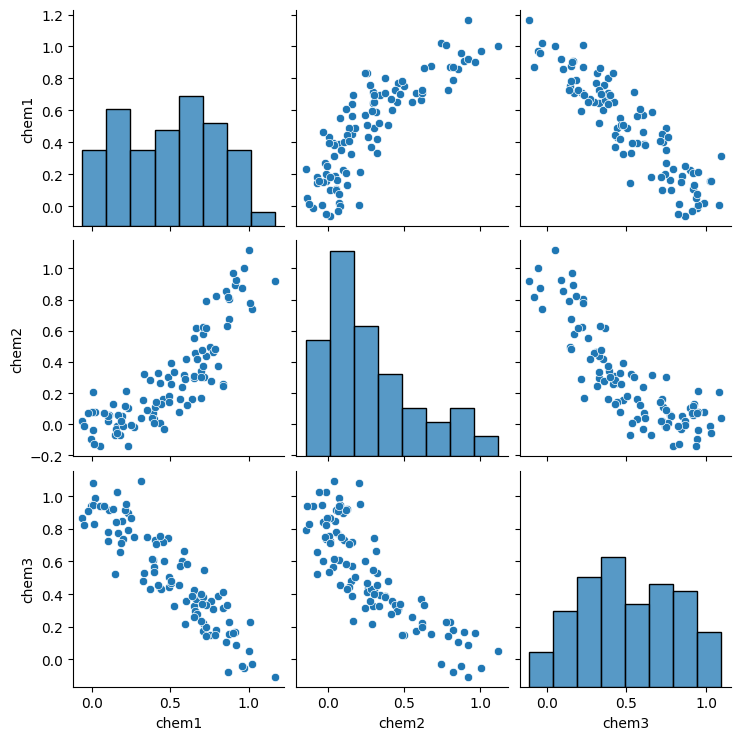

In [ ]:
sns.pairplot(df_chem)

If I had to narrow down the pair plot to just three graphs, I would select the scatterplots between chem1 and chem2, chem1 and chem3, and chem2 and chem3. These plots display the clearest patterns of correlation specifically, a strong positive linear relationship between chem1 and chem2, and strong negative relationships between chem1 and chem3, as well as between chem2 and chem3. These three views provide the most insight into how the chemical levels relate to each other in the water samples.

To make these graphs more informative, I would add regression lines to each scatterplot. This would help emphasize the strength and direction of the relationships and make the patterns more readable, especially for someone unfamiliar with interpreting scatterplots. I would also adjust the point size and opacity (for example, using smaller, semi-transparent points) to reduce visual clutter from overlapping dots. Adding axis labels with units and color-coding based on categories like sampling location or time could also enhance clarity.

If I had to choose just one graph, I would display the scatterplot of chem1 vs. chem2, since it shows the clearest and strongest linear relationship, making it the most informative single view. On the other hand, if I had to select six graphs, I would include the three key scatterplots mentioned above along with the three histograms for chem1, chem2, and chem3. These histograms, found along the diagonal of the pair plot, reveal the distribution of each chemical independently. Together, these six plots would offer a well-rounded snapshot of both the individual behaviors of the chemicals and how they interact with one another.

# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

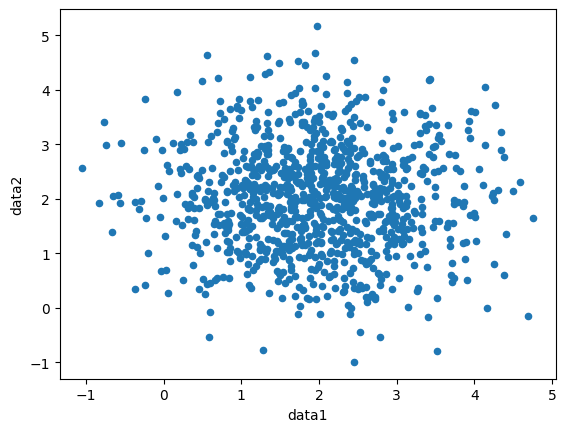

In [ ]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

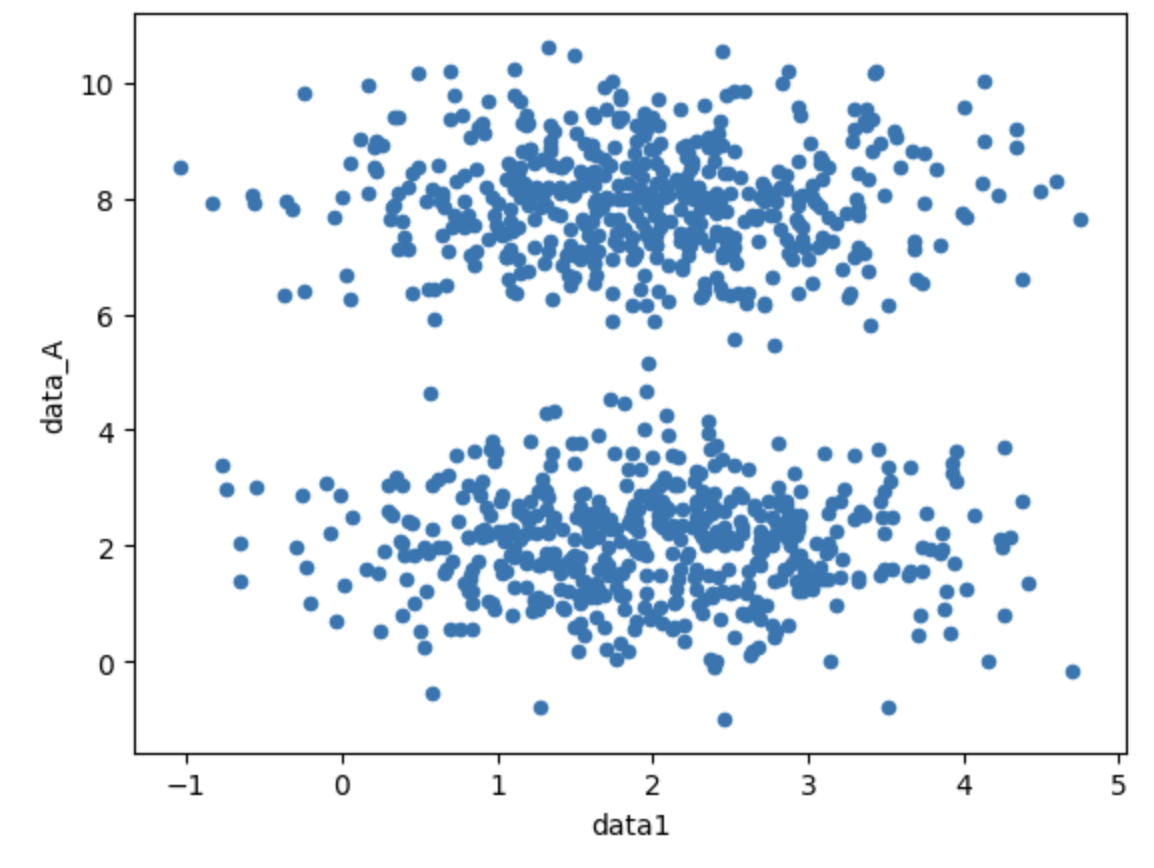

In [ ]:
from IPython.display import Image
Image("twoclouds.png")

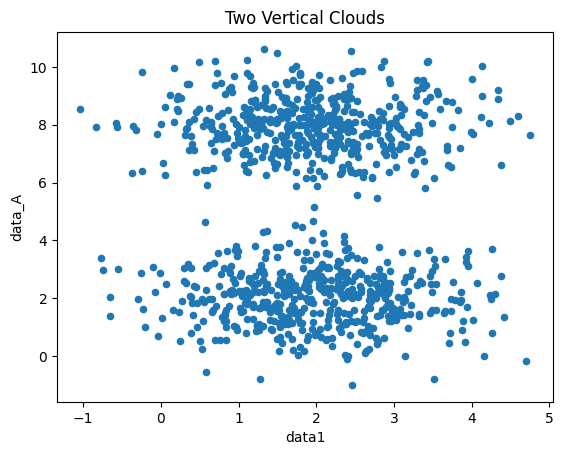

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

num_points = 500  # 500 for each cloud
np.random.seed(0)

# data1: same x-distribution as original example
data1 = np.random.normal(size = num_points * 2) + 2

# data_A: stack two vertical clouds
cloud1 = np.random.normal(size = num_points) + 2  # Lower cloud
cloud2 = np.random.normal(size = num_points) + 8  # Upper cloud
data_A = np.concatenate([cloud1, cloud2])

# Put into DataFrame
df_twoclouds = pd.DataFrame({"data1": data1, "data_A": data_A})
df_twoclouds.plot.scatter(x = "data1", y = "data_A", title="Two Vertical Clouds")

plt.show()


Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

In [ ]:
from IPython.display import Image
Image("threeclouds.png")

FileNotFoundError: No such file or directory: 'threeclouds.png'

FileNotFoundError: No such file or directory: 'threeclouds.png'

<IPython.core.display.Image object>

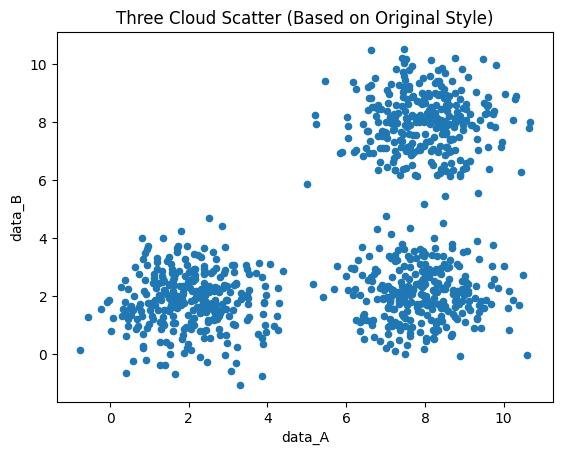

Correlation: 0.4839980195973717


In [ ]:
np.random.seed(0)
points_per_cluster = 300  # smaller clusters for clarity

# Segment 1: Left-mid cluster
seg1_data_A = np.random.normal(size=points_per_cluster) + 2  # x ≈ 2
seg1_data_B = np.random.normal(size=points_per_cluster) + 2  # y ≈ 2

# Segment 2: Right-mid cluster
seg2_data_A = np.random.normal(size=points_per_cluster) + 8  # x ≈ 8
seg2_data_B = np.random.normal(size=points_per_cluster) + 2  # y ≈ 2

# Segment 3: Right-top cluster
seg3_data_A = np.random.normal(size=points_per_cluster) + 8  # x ≈ 8
seg3_data_B = np.random.normal(size=points_per_cluster) + 8  # y ≈ 8

# Concatenate segments to form full series
data_A = np.concatenate([seg1_data_A, seg2_data_A, seg3_data_A])
data_B = np.concatenate([seg1_data_B, seg2_data_B, seg3_data_B])

df = pd.DataFrame({"data_A": data_A, "data_B": data_B})
df.plot.scatter(x="data_A", y="data_B", title="Three Cloud Scatter (Based on Original Style)")

plt.show()

#  Check correlation
print("Correlation:", df["data_A"].corr(df["data_B"]))


Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

Yes, we would expect to see a moderate positive correlation for this challenge problem. The computed correlation coefficient of approximately 0.48 confirms this. In the plot, data points are arranged in three distinct clusters: one where both data_A and data_B are low, one where data_A is high and data_B is low, and one where both are high. This means that lower values of data_A almost always correspond to lower values of data_B, while higher values of data_A could correspond to either high or low values of data_B. As a result, knowing the value of data_A gives us some information about the likely value of data_B, particularly when data_A is low. This partial predictability leads to a correlation that is clearly positive, but not perfect.

Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

In [ ]:
from IPython.display import Image
Image("histogram.png")

FileNotFoundError: No such file or directory: 'histogram.png'

FileNotFoundError: No such file or directory: 'histogram.png'

<IPython.core.display.Image object>

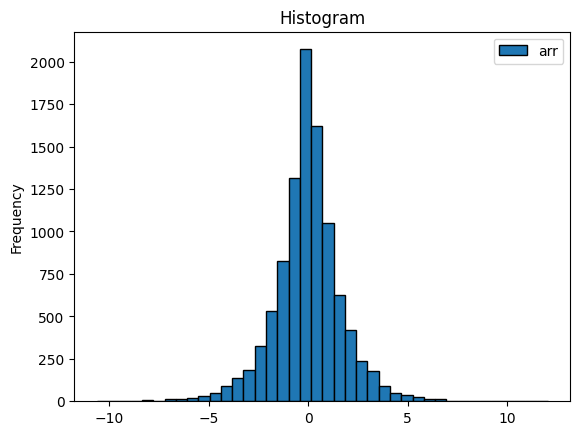

In [ ]:
np.random.seed(0)

# Generate Laplace-distributed data (heavy tails)
arr = np.random.laplace(loc=0, scale=1.2, size=10000)

# Plot histogram
pd.Series(arr).plot.hist(bins=40, edgecolor='black', legend=True, label='arr', title="Histogram")
plt.ylabel("Frequency")
plt.show()

Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

<Axes: title={'center': 'U-Shaped Sales Volume'}, xlabel='Month'>

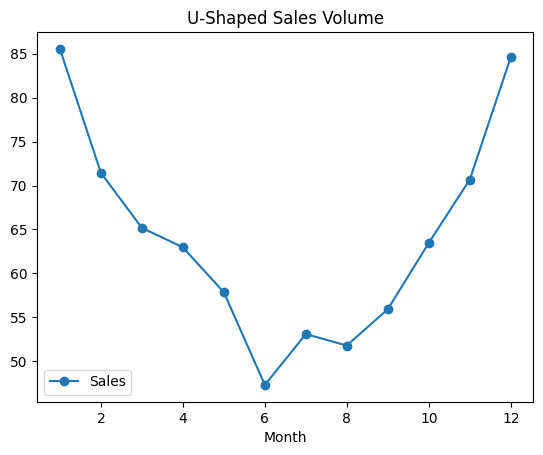

In [ ]:
# U-shaped line plot showing sales over a year
np.random.seed(0)
months = np.arange(1, 13)
softdrink_sales = 50 + ((months - 6.5) ** 2) + np.random.normal(0, 3, size=12)

df_sales = pd.DataFrame({'Month': months, 'Sales': softdrink_sales})
df_sales.plot(x='Month', y='Sales', kind='line', marker='o', title='U-Shaped Sales Volume')


Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

<Axes: title={'center': 'Sales Volume: Brand A vs Brand B'}, xlabel='Month'>

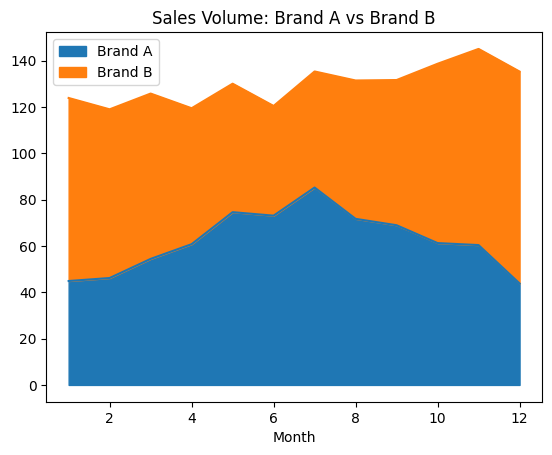

In [ ]:
# Area plot with Brand A increasing then decreasing, and Brand B doing the reverse
np.random.seed(1)
months = np.arange(1, 13)

brand_A = np.concatenate([
    np.linspace(40, 80, 6),
    np.linspace(80, 50, 6)
]) + np.random.normal(0, 3, size=12)

brand_B = np.concatenate([
    np.linspace(80, 50, 6),
    np.linspace(50, 90, 6)
]) + np.random.normal(0, 3, size=12)

df_brands = pd.DataFrame({'Month': months, 'Brand A': brand_A, 'Brand B': brand_B})
df_brands.set_index('Month').plot.area(title='Sales Volume: Brand A vs Brand B')


# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

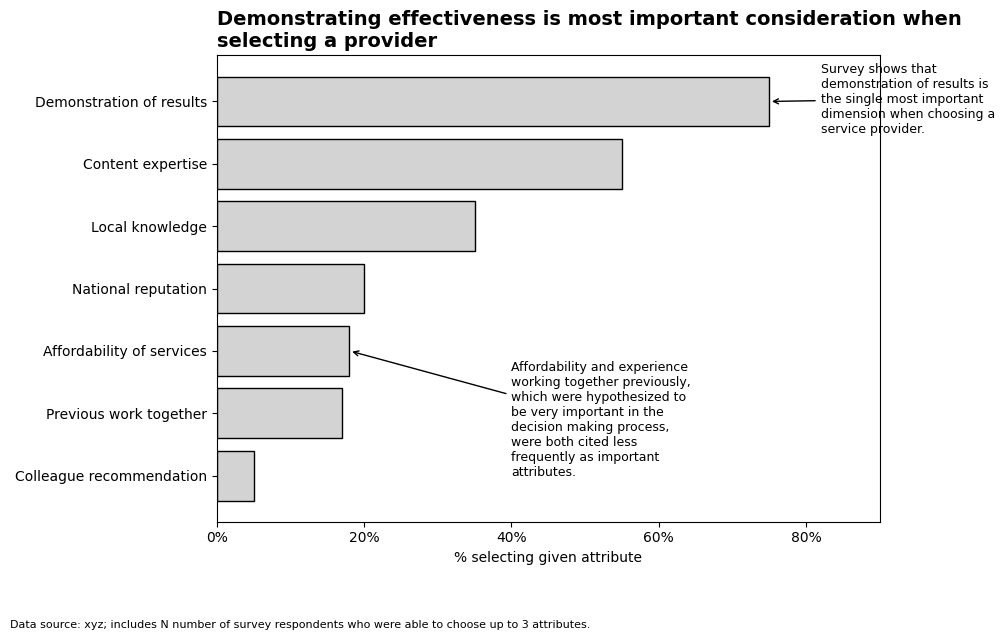

In [ ]:
# Data from the chart (approximate % values)
attributes = [
    "Demonstration of results",
    "Content expertise",
    "Local knowledge",
    "National reputation",
    "Affordability of services",
    "Previous work together",
    "Colleague recommendation"
]

values = [75, 55, 35, 20, 18, 17, 5]  # Approximate from image

# Create DataFrame
df = pd.DataFrame({'Attribute': attributes, 'Percent': values})
df = df.sort_values(by='Percent')  # Sort to match horizontal bar layout

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df['Attribute'], df['Percent'], color='lightgray', edgecolor='black')

# Title & subtitle
plt.title("Demonstrating effectiveness is most important consideration when\nselecting a provider", fontsize=14, weight='bold', loc='left')
plt.suptitle("", fontsize=10)
plt.xlabel("% selecting given attribute")

# Annotations
ax.annotate("Survey shows that\ndemonstration of results is\nthe single most important\ndimension when choosing a\nservice provider.",
            xy=(75, 6), xytext=(82, 5.5), textcoords='data',
            arrowprops=dict(arrowstyle='->'), fontsize=9)

ax.annotate("Affordability and experience\nworking together previously,\nwhich were hypothesized to\nbe very important in the\ndecision making process,\nwere both cited less\nfrequently as important\nattributes.",
            xy=(18, 2), xytext=(40, 0), textcoords='data',
            arrowprops=dict(arrowstyle='->'), fontsize=9)

# Tweak axes
ax.set_xlim(0, 90)
ax.set_xticks([0, 20, 40, 60, 80])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%'])

# Footnote
plt.figtext(0.01, -0.08, "Data source: xyz; includes N number of survey respondents who were able to choose up to 3 attributes.", ha="left", fontsize=8)

plt.tight_layout()
plt.show()